### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Preparation

In [3]:
data = pd.read_table("Twitter-Absolute-Sigma-500.data",sep=",",header=None)

In [4]:
X_data = data.iloc[:,0:77]
Y_data = data.iloc[:,77]

In [5]:
from sklearn.model_selection import train_test_split
X_whytouse, sampled_X, Y_whytouse, sampled_y = train_test_split(X_data, Y_data, shuffle = True, test_size = 0.01, random_state=42)
#Sampling the dataset so that it doesn't take a lot of time for processing

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampled_X = scaler.fit_transform(sampled_X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

Classification:

Voting Classifiers:

Hard voting

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf,  svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8959810874704491
SVC 0.8794326241134752
VotingClassifier 0.8794326241134752


C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Soft Voting

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8959810874704491
SVC 0.8794326241134752
VotingClassifier 0.9550827423167849


C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
bag_dtclf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_dtclf.fit(X_train, y_train)
y_bag_dtclf_pred = bag_dtclf.predict(X_test)

In [11]:
print('Train score: {:.2f}'.format(bag_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtclf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svc_lin = LinearSVC(random_state=42)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [76]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.94
Test score: 0.96


Pasting

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
bag_dtclf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_dtclf.fit(X_train, y_train)
y_bag_dtclf_pred = bag_dtclf.predict(X_test)

print('Train score: {:.2f}'.format(bag_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtclf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svc_lin = LinearSVC(random_state=42)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.94
Test score: 0.96


Ada Boosting

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_dtclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dtclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [18]:
print('Train score: {:.2f}'.format(ada_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_dtclf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.96


In [19]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

ada_logclf = AdaBoostClassifier(logistic, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_logclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [20]:
print('Train score: {:.2f}'.format(ada_logclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_logclf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.83


Boosting

In [21]:
from  sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [22]:
print('Train score: {:.2f}'.format(gbcl.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbcl.score(X_test, y_test)))

Train score: 0.98
Test score: 0.97


PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 77)
X_PCAtrans = pca.fit_transform(sampled_X)

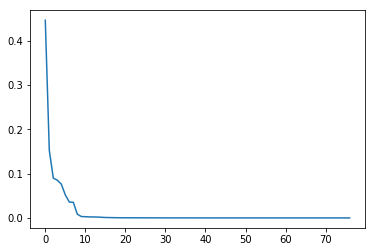

In [24]:
variance_ratio=pca.explained_variance_ratio_
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

From the given plot it appears that the best possible components for the PCA decomposition is 9.

In [25]:
pca = PCA(n_components = 9)
X_PCAtrans = pca.fit_transform(sampled_X)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

knn classifier

In [26]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score

k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=k_range)
grid_knnclf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_knnclf.fit(X_pca_train, y_pca_train)
print(grid_knnclf.best_score_)
print(grid_knnclf.best_params_)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9512690355329949
{'n_neighbors': 5}


In [27]:
y_knn_predict = grid_knnclf.predict(X_pca_test)
y_knn_train_predict = grid_knnclf.predict(X_pca_train)

In [28]:
report_table = [['knn', 'k = 5', grid_knnclf.score(X_pca_train, y_pca_train), grid_knnclf.score(X_pca_test, y_pca_test), roc_auc_score(y_knn_train_predict, y_pca_train), roc_auc_score(y_knn_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929]]

Logistic Regression

In [29]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=C, penalty=penalty)
grid_lg = GridSearchCV(logistic, hyperparameters, cv=5, scoring='accuracy')
grid_lg.fit(X_pca_train, y_pca_train)
print(grid_lg.best_score_)
print(grid_lg.best_params_)

0.9604060913705583
{'C': 100, 'penalty': 'l2'}


In [30]:
lg_predict = grid_lg.predict(X_pca_test)
lg_train_predict = grid_lg.predict(X_pca_train)

In [31]:
report_table =report_table + [['lg', 'C=100, Penalty=12', grid_lg.score(X_pca_train, y_pca_train), grid_lg.score(X_pca_test, y_pca_test), roc_auc_score(lg_train_predict, y_pca_train), roc_auc_score(lg_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286]]

Linear SVC

In [32]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 10, scoring='accuracy')
grid_svc_lin.fit(X_pca_train,y_pca_train)
print(grid_svc_lin.best_score_)
print(grid_svc_lin.best_params_)

0.9604060913705583
{'C': 10}


In [33]:
lin_svc_predict = grid_svc_lin.predict(X_pca_test)
lin_svc_train_predict = grid_svc_lin.predict(X_pca_train)

In [96]:
report_table =report_table + [['lin_svc', 'C=100', grid_svc_lin.score(X_pca_train, y_pca_train), grid_svc_lin.score(X_pca_test, y_pca_test), roc_auc_score(lin_svc_train_predict, y_pca_train), roc_auc_score(lin_svc_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['lin_svc',
  'C=100',
  0.9624365482233502,
  0.9692671394799054,
  0.9492254591095257,
  0.9692522561237645]]

Kernalized SVC

In [34]:
from sklearn.svm import SVC
#Grid Search with Cross-Validation using cv=10
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_svc.fit(X_pca_train,y_pca_train)

print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 100, 'gamma': 1}
0.9614213197969543


In [35]:
svc_predict = grid_svc.predict(X_pca_test)
svc_train_predict = grid_svc.predict(X_pca_train)

In [36]:
report_table =report_table + [['svc', 'C=100, gamma = 1', grid_svc.score(X_pca_train, y_pca_train), grid_svc.score(X_pca_test, y_pca_test), roc_auc_score(svc_train_predict, y_pca_train), roc_auc_score(svc_predict, y_pca_test)]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['svc',
  'C=100, gamma = 1',
  0.9685279187817258,
  0.9692671394799054,
  0.9518109875529159,
  0.9635669964782828]]

Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'accuracy')
grid_dt.fit(X_pca_train,y_pca_train)

print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 4}
0.9563451776649746


In [38]:
dt_predict = grid_dt.predict(X_pca_test)
dt_train_predict = grid_dt.predict(X_pca_train)

In [39]:
report_table =report_table + [['DT', 'Max Depth = 4', grid_dt.score(X_pca_train, y_pca_train), grid_dt.score(X_pca_test, y_pca_test), roc_auc_score(dt_train_predict, y_pca_train), roc_auc_score(dt_predict, y_pca_test)]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['svc',
  'C=100, gamma = 1',
  0.9685279187817258,
  0.9692671394799054,
  0.9518109875529159,
  0.9635669964782828],
 ['DT',
  'Max Depth = 4',
  0.9756345177664975,
  0.9574468085106383,
  0.9596987599618451,
  0.9344192634560906]]

In [40]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 5,0.963452,0.952719,0.941027,0.940046
lg,lg,"C=100, Penalty=12",0.963452,0.964539,0.955044,0.966071
svc,svc,"C=100, gamma = 1",0.968528,0.969267,0.951811,0.963567
DT,DT,Max Depth = 4,0.975635,0.957447,0.959699,0.934419


Results from the models without PCA

Model name	Model parameter	Train accuracy	Test accuracy	Train auc score	Test auc score
knn	        k = 5	        0.961421	    0.950355	    0.950905	    0.938095
lg	        C=1000, 
            Penalty=12	    0.972589	    0.964539	    0.959590	    0.954700
lin_svc	    C=10	        0.963452	    0.966903	    0.955044	    0.967662
svc	        C=100, 
            gamma = 1	    0.977665	    0.959811	    0.968110	    0.940985
DT	        Max Depth = 2	0.975635	    0.962175	    0.957540	    0.938568


PCA does help in getting better results

Neural Network

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_clf = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_clf.fit(X_train, y_train)
print(grid_clf.best_score_)
print(grid_clf.best_params_)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


0.966497461928934
{'batch_size': 10, 'epochs': 100}


In [42]:
print('Train score: {:.2f}'.format(grid_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grid_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96
